Exercise 1

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

In [58]:
# Constants
sigma = 3.405 # in Angstroms
epsilon = 119.87 # in Kelvins (divided by Boltzmann's constant)

box_min = -7.9523840713484417e-01 # lower extent of box (in Angstroms)
box_max = 5.1656065646189937e+01 # upper extent of box (in Angstroms)

cut_off = 3 * sigma  # maximum distance for pair-wise interaction
size = 4000

The dimensions of the box have no specified units in the input code. From the fact that there are ca. 16 atoms per side of the cube, one can infer that the unit is angstroms (resulting in an atomic radius of 1.6 Angstroms which is a realistic value.

In [32]:
# importing the CSV file 
filename = 'conf.xyz'
data = pandas.read_csv(filename, delimiter=r"\s+",header=8)
print(data)

      ITEM:  ATOMS  id  mol      type         q        xs  ys  zs
0      1004   1004   1    0  0.102871  0.069589  0.076414 NaN NaN
1      1154   1154   1    0  0.056106  0.072340  0.020769 NaN NaN
2      2650   2650   2    0  0.100080  0.026585  0.020079 NaN NaN
3      3333   3333   2    0  0.057326  0.018064  0.072037 NaN NaN
4      2239   2239   2    0  0.097945  0.019903  0.123387 NaN NaN
...     ...    ...  ..  ...       ...       ...       ...  ..  ..
3995   1369   1369   1    0  0.905949  0.921946  0.829542 NaN NaN
3996   1159   1159   1    0  0.502664  0.919078  0.918626 NaN NaN
3997   2812   2812   2    0  0.505729  0.971735  0.878737 NaN NaN
3998   1780   1780   1    0  0.505528  0.768727  0.980025 NaN NaN
3999    863    863   1    0  0.999681  0.917212  0.830497 NaN NaN

[4000 rows x 9 columns]


In [33]:
atom = np.array(data['ATOMS'])
identity = np.array(data['id'])
# mol = np.array(data['mol'])
x = (box_max-box_min) * np.array(data['type']) + box_min
y = (box_max-box_min) * np.array(data['q']) + box_min
z = (box_max-box_min) * np.array(data['xs']) + box_min

# PLOT
#plt.figure(dpi=1200)
#plt.scatter(atom, y)

In [35]:
# Functions 

def distance(x, y, z):
    return np.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2 + (z[i]-z[j])**2)



In [59]:
# Compute Pair-wise interaction 

E = np.zeros(size)
for i in range(size): 
    for j in range(size): 
        if distance(x, y, z) < 10e-5:
            pass 
        elif distance(x, y, z) <= cut_off:
            E[i] += 4 * epsilon * ((sigma / distance(x, y, z)) ** 12 - (sigma / distance(x, y, z)) ** 6 )    
        else:
            pass

In [63]:
total_E = 0.5 * np.sum(E)
print(E)
print("The total potential energy of the system is: ", total_E, "k_b K")

[-1570.10401827  -791.10082425  -478.12219769 ... -1050.42324338
 -1159.63076117  -724.97648498]
The total potential energy of the system is:  -3000864.997378607 k_b K


Exercise 2

In [65]:
# Constants
sigma = 3.405 # in Angstroms
epsilon = 119.87 # in Kelvins (divided by Boltzmann's constant)
lambda_a = 49
lambda_r = 50

cut_off = 1.5 * sigma  # maximum distance for pair-wise interaction

In [66]:
def distance(x, y, z):
    return np.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2 + (z[i]-z[j])**2)

def hard_sphere(distance):
    return lambda_r * (lambda_r/lambda_a) ** lambda_a * epsilon * ((sigma/distance) ** lambda_r - (sigma/distance) ** lambda_a) + epsilon
    

In [68]:
# Compute Pair-wise interaction 

E = np.zeros(size)
for i in range(size): 
    for j in range(size): 
        if distance(x, y, z) < 10e-5:
            pass 
        elif distance(x, y, z) >= (lambda_r/lambda_a)*sigma:
            pass
        elif distance(x, y, z) < (lambda_r/lambda_a)*sigma:
            
            E[i] += hard_sphere(distance(x, y, z))

In [69]:
total_E = 0.5 * np.sum(E) # multiply by 0.5 to avoid double-counting
print(E)
print("The total potential energy of the system is: ", total_E, "k_b K")

[  50.43422403 1239.0853147  1305.58996539 ...   29.49425264  119.53721012
    0.        ]
The total potential energy of the system is:  190546.04570444173 k_b K


Exercise 3

In [74]:
# Constants

kappa = 5 # in Angstroms
cut_off_Yukawa = 3.5 * sigma 

In [75]:
def distance(x, y, z):
    return np.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2 + (z[i]-z[j])**2)

def E_Yukawa(distance):
    return epsilon * sigma / distance * np.exp(-kappa*(distance - sigma))
    

In [76]:
# Compute Pair-wise interaction 

E = np.zeros(size)

# Hard-Sphere potential 
for i in range(size): 
    for j in range(size): 
        if i == j:
            pass 
        elif distance(x, y, z) < sigma: 
            E[i] += 10e20 # analogous to infinity 
        else: 
            pass

# Yukawa potential
for i in range(size): 
    for j in range(size):         
        if i == j:
            pass 
        elif distance(x, y, z) > cut_off_Yukawa:
            pass
        elif identity[i] == identity[j]:
            E[i] += E_Yukawa(distance(x, y, z))
        elif identity[i] != identity[j]: 
            E[i] -= E_Yukawa(distance(x, y, z))
        else:
            pass
        
        

In [77]:
total_E = 0.5 * np.sum(E) # multiply by 0.5 to avoid double-counting
print(E)
print("The total potential energy of the system is: ", total_E, "k_b K")

[-1.63933652e+02  1.00000000e+21  1.00000000e+21 ... -2.66286085e+02
  2.51984407e+01 -3.25578704e+01]
The total potential energy of the system is:  5.04e+23 k_b K


Comment: The computed energy is very large since ca. 500 of the particles overlap.

Exercise 3.2

In [95]:
from scipy.interpolate import interp1d as interp
import math

In [118]:
# Constants 
T = 179.81 # in Kelvins
mass = 6.63 * 10e-26 # particle mass in kg
kB = 1.38e-23 
v = np.arange(0,4000,1)

The Boltzmann speed distribution can be used instead of of velocity distribution since the velocity vectors are equally distributed over all angles. The standard Boltzmann velocity distribution needs to be integrated to find the cumulative distribution functin for the speeds so that random numbers with Boltzmann coefficients can be generated.

In [123]:
# Boltzmann distribution - speed
def MB_speed(v,m,T):
    return (m/(2*np.pi*kB*T))**1.5 * 4*np.pi * v**2 * np.exp(-m*v**2/(2*kB*T))

# Cumulative Boltzmann distribution - speed
def MB_CDF(v,m,T):
    a = np.sqrt(kB*T/m)
    return erf(v/(np.sqrt(2)*a)) - np.sqrt(2/np.pi)* v* np.exp(-v**2/(2*a**2))/a


In [112]:
# create CDF
vs = np.arange(0,2500,0.1)
cdf = MB_CDF(vs,mass,T) # essentially y = f(x)

#create interpolation function to CDF
inv_cdf = interp(cdf,vs) # essentially what we have done is made x = g(y) from y = f(x)
                         # this can now be used as a function which is 
                         # called in the same way as normal routines

In [116]:
def generate_velocities(n):
    rand_nums = np.random.random(n)
    speeds = inv_cdf(rand_nums)
    
    # spherical polar coords - generate random angle for velocity vector, uniformly distributed over the surface of a sphere
    # see http://mathworld.wolfram.com/SpherePointPicking.html for more info (note theta and phi are the other way around!)
    theta = np.arccos(np.random.uniform(-1,1,n))
    phi = np.random.uniform(0,2*np.pi,n)
    
    # convert to cartesian units
    vx = speeds * np.sin(theta) * np.cos(phi) 
    vy = speeds * np.sin(theta) * np.sin(phi)
    vz = speeds * np.cos(theta)
    
    return speeds, vx, vy, vz

[213.49953396 255.68228456 302.17994516 ... 224.10029608 409.59252002
 154.72275806]


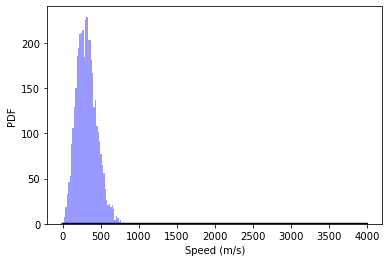

In [130]:
spd, vx, vy, vz = generate_velocities(4000)

fig = plt.figure()
ax = fig.add_subplot(111)

#generate histogram of velocities
ax.hist(spd,bins=50,fc='b',alpha=0.4,lw=0.2)

#compare this histogram to f(v) - this is MB_speed that we wrote earlier
vs = np.arange(0,4000)

fv = MB_speed(velocities,mass,temp)
ax.plot(velocities,fv,'k',lw=2)

ax.set_xlabel('Speed (m/s)')
ax.set_ylabel('PDF')
     
print(spd) # spd contains velocities of all 4000 atoms in the initial configuration